# importing packages
 - includes downloading open image dataset from keras (mnist dataset)

In [29]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load data - image dataset

In [30]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# showing the images in the dataset

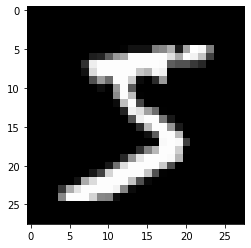

In [31]:
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.show()


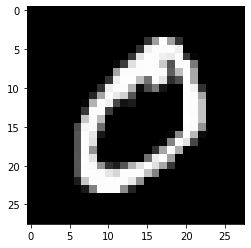

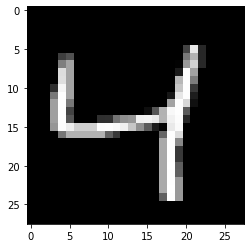

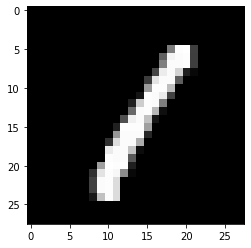

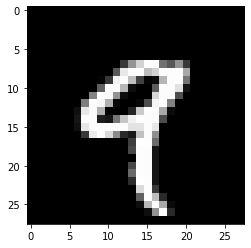

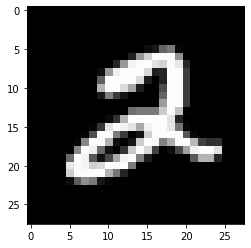

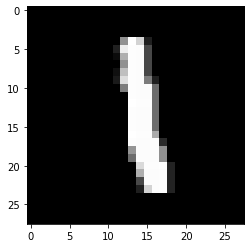

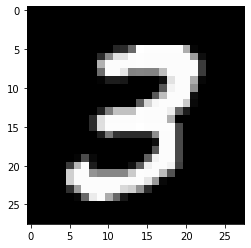

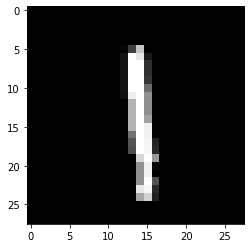

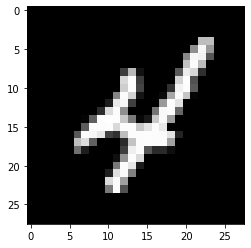

In [32]:
for i in range(1, 10, 1):
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
y_train.shape

(60000,)

# reshaping the dataset

In [35]:
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

# normalization of the dataset
- usually the pixel value range between 0 to 255. If the image is colored, it has three channels, each channel ranging between 0 and 255.
- normalization so that the pixel value range between 0 and 1.

In [36]:
X_train = X_train / 255
X_test = X_test / 255

In [37]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


# categorization of the target variable
Before: numbers like 0, 1, 2, 3, …, 9

After: an array such as:

[1, 0, 0, 0, …0] (for 0)

[0, 1, 0, 0, …0] (for 1)

[0, 0, 1, 0, …0] (for 2)

…

[0, 0, 0, 0, …1] (for 9)


In [38]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
print(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# import the keras model and layers to start building our neural network model

- Sequential implies an NN built layer-by-layer
- A dense layer implies every neuron is connected to all neurons in the previous layer

A dense layer is basically a fully connected neural layer


In [39]:
from keras.models import Sequential
from keras.layers import Dense

“input_dim” is only needed for the first hidden layer.

input_dim indicates an implicit input layer

In [40]:
model = Sequential()
model.add(Dense(10, input_dim=784, init='normal', activation='softmax'))

S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, input_dim=784, activation="softmax", kernel_initializer="normal")`
  


 a two-layer neural network
 - one input layer
 - one output layer
 implies that this is not a neural network, but a logistic regression doing classification over 10 classes.
 10 neurons in output layer correspond to yielding probability of data being in 10 classes.


loss - corresponds to loss function/cost function

optimizer - is an algorithm used to optimize the cost function

nb_epoch - corresponds to the number of iterations 

batch_size - correspons to the number of data records considered in each iteration of mini-batch optimization


In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 1s - loss: 0.7982 - acc: 0.8036 - val_loss: 0.4380 - val_acc: 0.8907
Epoch 2/10
 - 1s - loss: 0.4031 - acc: 0.8942 - val_loss: 0.3489 - val_acc: 0.9072
Epoch 3/10
 - 1s - loss: 0.3455 - acc: 0.9068 - val_loss: 0.3157 - val_acc: 0.9133
Epoch 4/10
 - 1s - loss: 0.3189 - acc: 0.9122 - val_loss: 0.2996 - val_acc: 0.9168
Epoch 5/10
 - 1s - loss: 0.3030 - acc: 0.9164 - val_loss: 0.2910 - val_acc: 0.9205
Epoch 6/10
 - 1s - loss: 0.2928 - acc: 0.9181 - val_loss: 0.2847 - val_acc: 0.9209
Epoch 7/10
 - 1s - loss: 0.2848 - acc: 0.9209 - val_loss: 0.2783 - val_acc: 0.9239
Epoch 8/10
 - 1s - loss: 0.2787 - acc: 0.9228 - val_loss: 0.2740 - val_acc: 0.9235
Epoch 9/10
 - 1s - loss: 0.2742 - acc: 0.9238 - val_loss: 0.2729 - val_acc: 0.9244
Epoch 10/10
 - 1s - loss: 0.2702 - acc: 0.9248 - val_loss: 0.2703 - val_acc: 0.9242


In [43]:
scores = model.evaluate(X_test, y_test)

# indicates the accuracy
scores[1]

10000/10000 [==============================] - 0s 15us/step


0.9242

# three layer neural network

- one input layer (implicitly denoted by input_dim consisting of neurons equal to the number of features)
- one hidden layer (consisting of 784 neurons dense layer)
- one output layer (consisting of 10 neurons - activation is softmax. 10 because it contains 10 classes)

In [44]:
model = Sequential()
model.add(Dense(784, input_dim=784, init='normal', activation='relu'))
model.add(Dense(10, init='normal', activation='softmax'))


S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  
S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test)
scores[1]


S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2774 - acc: 0.9221 - val_loss: 0.1357 - val_acc: 0.9620
Epoch 2/10
 - 3s - loss: 0.1108 - acc: 0.9679 - val_loss: 0.0969 - val_acc: 0.9710
Epoch 3/10
 - 3s - loss: 0.0716 - acc: 0.9790 - val_loss: 0.0721 - val_acc: 0.9770
Epoch 4/10
 - 3s - loss: 0.0496 - acc: 0.9857 - val_loss: 0.0685 - val_acc: 0.9783
Epoch 5/10
 - 3s - loss: 0.0360 - acc: 0.9900 - val_loss: 0.0647 - val_acc: 0.9801
Epoch 6/10
 - 3s - loss: 0.0268 - acc: 0.9927 - val_loss: 0.0659 - val_acc: 0.9797
Epoch 7/10
 - 3s - loss: 0.0203 - acc: 0.9948 - val_loss: 0.0564 - val_acc: 0.9819
Epoch 8/10
 - 3s - loss: 0.0148 - acc: 0.9967 - val_loss: 0.0566 - val_acc: 0.9827
Epoch 9/10
 - 3s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0600 - val_acc: 0.9820
Epoch 10/10
 - 3s - loss: 0.0072 - acc: 0.9990 - val_loss: 0.0575 - val_acc: 0.9832
10000/10000 [==============================] - 0s 45us/step


0.9832

# Use of advanced activation PReLU instead of RELU activation

In [46]:
from keras.layers.advanced_activations import PReLU
model = Sequential()
model.add(Dense(784, input_dim=784, init='normal'))
model.add(PReLU())
model.add(Dense(10, init='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test)
scores[1]

S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  """
S:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2786 - acc: 0.9206 - val_loss: 0.1292 - val_acc: 0.9612
Epoch 2/10
 - 4s - loss: 0.1068 - acc: 0.9691 - val_loss: 0.1000 - val_acc: 0.9690
Epoch 3/10
 - 4s - loss: 0.0651 - acc: 0.9811 - val_loss: 0.0703 - val_acc: 0.9774
Epoch 4/10
 - 4s - loss: 0.0432 - acc: 0.9876 - val_loss: 0.0671 - val_acc: 0.9786
Epoch 5/10
 - 4s - loss: 0.0302 - acc: 0.9916 - val_loss: 0.0655 - val_acc: 0.9797
Epoch 6/10
 - 4s - loss: 0.0213 - acc: 0.9946 - val_loss: 0.0625 - val_acc: 0.9799
Epoch 7/10
 - 4s - loss: 0.0137 - acc: 0.9971 - val_loss: 0.0555 - val_acc: 0.9825
Epoch 8/10
 - 4s - loss: 0.0104 - acc: 0.9980 - val_loss: 0.0566 - val_acc: 0.9825
Epoch 9/10
 - 4s - loss: 0.0071 - acc: 0.9988 - val_loss: 0.0563 - val_acc: 0.9834
Epoch 10/10
 - 4s - loss: 0.0045 - acc: 0.9995 - val_loss: 0.0554 - val_acc: 0.9835
10000/10000 [==============================] - 1s 52us/step


0.9835